In [28]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt

## Loading Data

In [29]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.astype("float32") / 255.0
test_images = test_images.astype("float32") / 255.0

train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

## Compiling 

In [30]:
def Compile(model):
    optimizer = keras.optimizers.AdamW(learning_rate=0.001)

    early_stop = keras.src.callbacks.EarlyStopping(
        monitor="val_loss", patience=3, restore_best_weights=True
    )

    lr_schedule = keras.src.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
    )

    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )

    history = model.fit(
        train_images,
        train_labels,
        validation_split=0.2,
        epochs=50,
        batch_size=128,
        callbacks=[lr_schedule, early_stop],
        verbose=1,
    )
    return history

In [31]:
# Model 1 - only L2 

model_1 = keras.Sequential([
    keras.layers.Input(shape=(784,)),

    keras.layers.Dense(512, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(1e-4),
                       kernel_initializer='he_normal'),

    keras.layers.Dense(256, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(1e-4),
                       kernel_initializer='he_normal'),

    keras.layers.Dense(128, activation='relu',
                       kernel_regularizer=keras.regularizers.l2(1e-4),
                       kernel_initializer='he_normal'),

    keras.layers.Dense(10, activation='softmax')
])

# Model 2 - Gaussian Noise, L1/L2, Batch Normalization, Dropout

model_2 = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.GaussianNoise(0.1),  

    keras.layers.Dense(512,
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l1_l2(l1=1e-6, l2=5e-5)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.2),  

    keras.layers.Dense(256,
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(5e-5)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.15),  

    keras.layers.Dense(64,
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(5e-5)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.1),  

    keras.layers.Dense(10, activation='softmax')
])


In [32]:
history_1 = Compile(model_1)
history_2 = Compile(model_2)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.8638 - loss: 0.6003 - val_accuracy: 0.9630 - val_loss: 0.2468 - learning_rate: 0.0010
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9705 - loss: 0.2195 - val_accuracy: 0.9715 - val_loss: 0.2114 - learning_rate: 0.0010
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9814 - loss: 0.1720 - val_accuracy: 0.9686 - val_loss: 0.2096 - learning_rate: 0.0010
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9860 - loss: 0.1485 - val_accuracy: 0.9737 - val_loss: 0.1814 - learning_rate: 0.0010
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9884 - loss: 0.1309 - val_accuracy: 0.9726 - val_loss: 0.1821 - learning_rate: 0.0010
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9881 - loss: 0.1266 - val_accuracy: 0.9785 - val_loss: 0.1588 - learning_rate: 0.0010
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9913 - loss: 0

## Comparision 

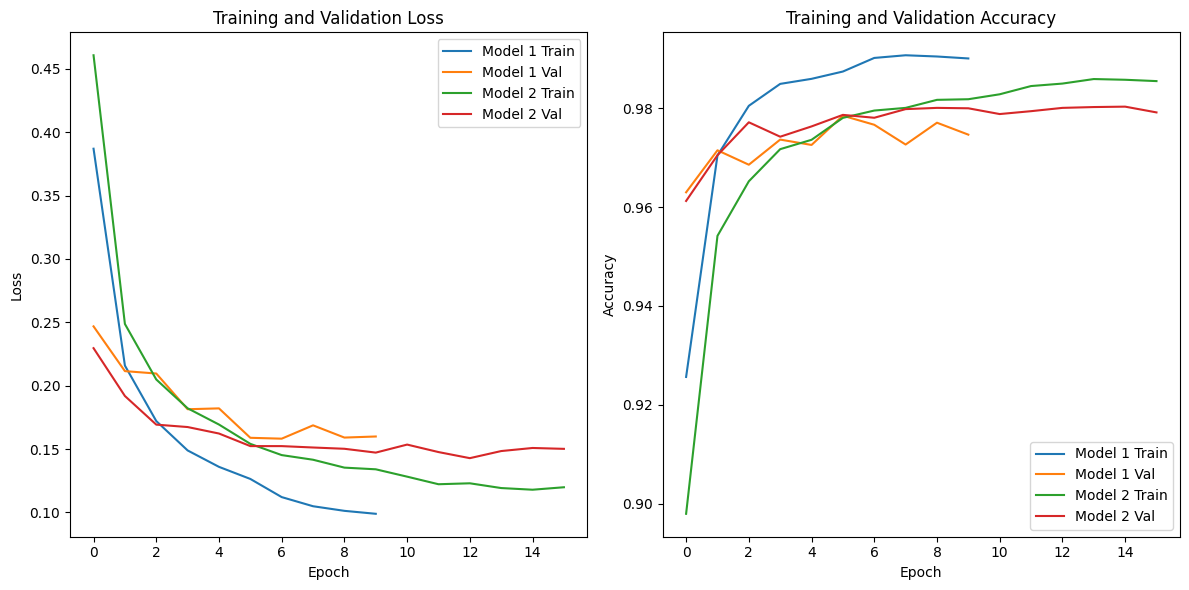

In [33]:
def plot_history(histories, names):
    plt.figure(figsize=(12, 6))

    
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history["loss"], label=f"{name} Train")
        plt.plot(history.history["val_loss"], label=f"{name} Val")
    plt.title("Training and Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history["accuracy"], label=f"{name} Train")
        plt.plot(history.history["val_accuracy"], label=f"{name} Val")
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


plot_history([history_1, history_2], ["Model 1", "Model 2"])

## Accuracy 

In [35]:
test_loss_model1, test_accuracy_model1 = model_1.evaluate(test_images, test_labels, verbose=0)
test_loss_model2, test_accuracy_model2 = model_2.evaluate(test_images, test_labels, verbose=0)

print(f"Model 1 - Test Accuracy: {test_accuracy_model1:.4f}, Test Loss: {test_loss_model1:.4f}")
print(f"Model 2 - Test Accuracy: {test_accuracy_model2:.4f}, Test Loss: {test_loss_model2:.4f}")

Model 1 - Test Accuracy: 0.9783, Test Loss: 0.1569
Model 2 - Test Accuracy: 0.9819, Test Loss: 0.1387
